# Data Analysis with python (part II)

# 1. Lecture: Notes on gas thermodynamics

### Tutor: Wladimir E. Banda-Barragán

In this class:
- We will analyse data of a simulation of 2D and 3D turbulence.
- We will use CGS units as our standard units.
- We will assume the gas is ideal for simplicity.

Let's start by looking into the thermodynamical properties of ideal gases.

## Equation of state (EOS) of ideal gas:

If we assume the gas is ideal, the EOS is:

$$p = n\,k_B\,T,$$

where $p$ is the thermal pressure,

$$n=\frac{\rho}{\mu\,m}$$

is the number density (i.e. the number of particles per unit volume), $\mu$ is the mean particle mass, $m=1.67\times 10^{-24}\,\rm g$ is the atomic mass unit, $k_B=1.38\times 10^{-16}\,\rm cm^2\,g\,s^{-2}\,K^{-1}$ is the Boltzmann constant, and $T$ is the gas temperature in $\rm K$.

The equation above can also be written as:

$$p = \frac{N_A\,N}{V}k_B\,T \: \Longrightarrow \: p\,V = N\,R\,T,$$

where $N$ is is the number of moles, $N_{A}= 6.022\times10^{23}\,\rm mol^{−1}$ is the Avogadro constant (i.e. the number of particles per unit mole), $V$ is the gas volume, and $R=N_{A}\,k_B=8.314\times 10^7\,\rm erg\,mol^{-1}\,K^{-1}$ is the ideal gas constant. 

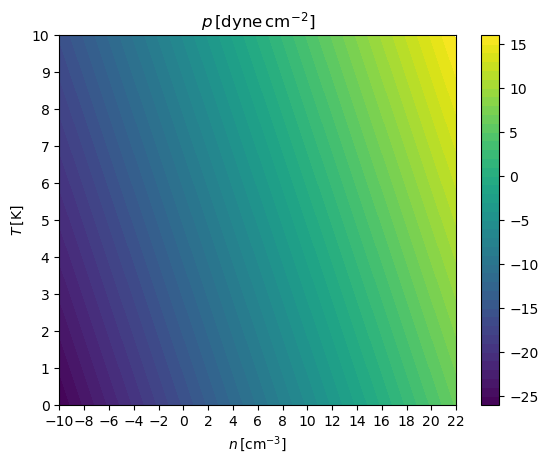

In [1]:
# Import some libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the EOS equation
def pressure(x, y):
    return (x*1.38e-16*y)

# Create a 2D grid with n and T as X and Y.
number_density = np.arange(-10,22,0.01)
temperature = np.arange(0,10,0.01)

X, Y = np.meshgrid(number_density, temperature)

# Compute pressure on the grid
pressure_2D = np.array(pressure(np.ravel(10**X), np.ravel(10**Y)))
Z = pressure_2D.reshape(X.shape)

# Plot pressure
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(-26, 16, 43), cmap='viridis')

# Add a colorbar and customise axes
fig.colorbar(cp) 
ax.set_title(r'$p\,\rm [dyne\,cm^{-2}$]')
ax.set_xticks(np.arange(-10,23,2))
ax.set_xlabel(r'$n\,\rm [cm^{-3}]$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$T\,\rm [K]$')
plt.show()

### Some examples:

Now, let us see some examples of characteristic pressures.

Atomic clouds in the interstellar medium (ISM) have temperatures and number densities of:

$$T_{\rm ism} = 10^{4}\,\rm K$$
$$n_{\rm ism} = 0.1\,\rm cm^{-3}=10^{-1}\,\rm cm^{-3}$$

On the other hand, dry air in out planet's atmosphere has:

$$T_{\rm ism} = 298.15\,\rm K = 10^{2.47}\,\rm K$$
$$n_{\rm ism} = 2.504\times 10^{19}\,\rm cm^{-3}$$

Using the EOS, we obtain the following pressures in $[\rm dyne\,cm^{-2}]$:

In [2]:
print('Atomic cloud in the interstellar medium:', "{:0.5e}".format(pressure(10**(-1),10**4.0)))
print('Dry air in the atmosphere of our planet:', "{:0.5e}".format(pressure(2.504*10**19,10**2.47)))

Atomic cloud in the interstellar medium: 1.38000e-13
Dry air in the atmosphere of our planet: 1.01980e+06


As we can see from the 19-dex difference the ISM gas is very diffuse compared to our atmosphere's air! 

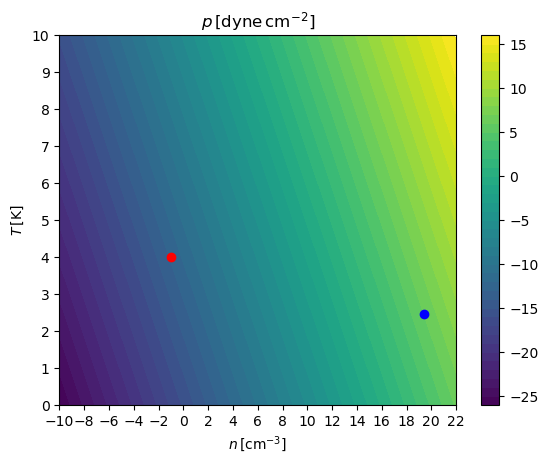

In [3]:
# Plot pressure again, including the two points above.
n1 = -1
T1 = 4

n2 = 19.3986343245
T2 = 2.47

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(-26, 16, 43), cmap='viridis')
ax.scatter(n1, T1, c='red')
ax.scatter(n2, T2, c='blue')
    
# Add a colorbar and customise axes
fig.colorbar(cp) 
ax.set_title(r'$p\,\rm [dyne\,cm^{-2}$]')
ax.set_xticks(np.arange(-10,23,2))
ax.set_xlabel(r'$n\,\rm [cm^{-3}]$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$T\,\rm [K]$')
plt.show()

## Polytropic index:

The polytropic index (or heat capacity ratio):

$$\gamma = \frac{c_P}{c_V},$$

where $c_P$ and $c_V$ are the specific heat capacities at constant pressure and volume, also depends on the degrees of freedom, $f$, of the particles making up the gas:

$$\gamma = 1+\frac{2}{f},$$

where $f$ can vary.</br>

### Some examples:

- In **mono-atomic gases** (e.g. atomic hydrogen, $H_{\rm I}$):</br>
We have $f=3$ (3 translational degrees), so $\gamma=\frac{5}{3}$.</br>
</br>
- In **di-atomic gases** composed of a single element (e.g. molecular hydrogen, $H_{\rm 2}$):</br>
We have $f=5$ (3 translational degrees plus 2 rotational degrees), so $\gamma=\frac{7}{5}$.

## Mean particle mass

Another quantity we mentioned above is the mean particle mass, $\mu$ (also known in the literature as the mean molecular weight).

- The mean particle mass relates to the chemistry of the gas.

- i.e. it depends on how many speciesare neutrals or ions, how many species are atomic or molecular, etc.

- It is a dimensionless quantity (it has no units).

- We can estimate it as follows:

$$\frac{1}{\mu}=\sum_i{\frac{x_i}{A_i}}\left(1+Z_i\right),$$

where $x_i$ is the fraction corresponding to each element, $i$, $A_i$ is the mass number of element $i$, and $Z_i$ is the charge of its nucleus.


### Some examples:

- In the case of fully ionised hydrogen gas (i.e. a p+ plasma), we have:

$$\frac{1}{\mu}={\frac{x_{H}}{A_{H}}}\left(1+Z_H\right)=\frac{1}{1}(1+1)=2\:\Longrightarrow\: \mu = 0.5$$

- In the case of fully ionised helium gas, we have:

$$\frac{1}{\mu}={\frac{x_{He}}{A_{He}}}\left(1+Z_{He}\right)=\frac{1}{4}(1+2)=\frac{3}{4}\:\Longrightarrow\: \mu = \frac{4}{3}=1.33$$


## Sound speed:

The characteristic speed at which small pressure fluctuations propagate in a gas is the **sound speed**, 

$$c_{\rm sound}=\sqrt{\gamma\frac{p}{\rho}},$$

where $\gamma$ is the polytropic index of the gas, $p$ is the thermal pressure, and $\rho$ is the mass density.

Using the EOS, we can rewrite the equation above as:

$$c_{\rm sound}=\sqrt{\gamma\frac{k_B\,T}{\mu\,m}}.$$

Therefore, the sound speed is a function of the temperature and chemistry of the gas. All the other quantities are constants.

In addition, if we assume that the gas chemistry is spatially uniform and remains the same throughout time, then the sound speed is a function of the gas temperature alone.

### Some examples:

- Let us fix some of the constants by assuming the gas is mono-atomic and adiabatic (so $\gamma=\frac{5}{3}$)

/Users/webb/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


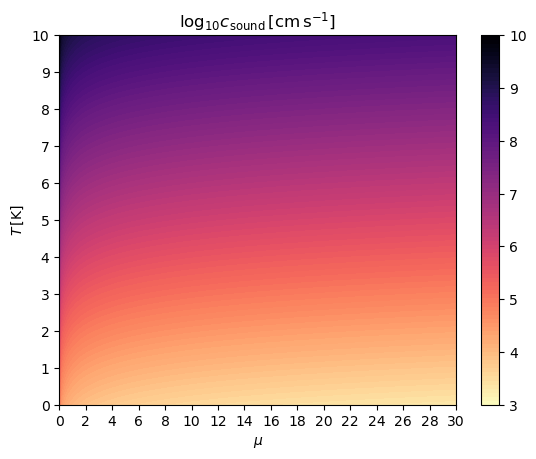

In [4]:
# Define the EOS equation
def sound_speed(mu, temp):
    gamma = 5./3.
    k_B = 1.38e-16
    amu = 1.660e-24 
    return np.sqrt((gamma*k_B*temp)/(mu*amu))

# Create a 2D grid with n and T as X and Y.
mu = np.arange(0,30,0.01)
temperature = np.arange(0,10,0.01)

X, Y = np.meshgrid(mu, temperature)

# Compute pressure on the grid
pressure_2D = np.array(sound_speed(np.ravel(X), np.ravel(10**Y)))
Z = pressure_2D.reshape(X.shape)

# Plot pressure
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(3, 10, 91), cmap='magma_r')

# Add a colorbar and customise axes
fig.colorbar(cp, ticks = np.arange(3,11,1))
ax.set_title(r'$\log_{10} c_{\rm sound}\,\rm [cm\,s^{-1}$]')
ax.set_xticks(np.arange(0,31.0,2.0))
ax.set_xlabel(r'$\mu$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$T\,\rm [K]$')
plt.show()

In [5]:
print('Atomic cloud in the interstellar medium:', "{:0.5e}".format(sound_speed(0.61,10**6.0)))

Atomic cloud in the interstellar medium: 1.50711e+07


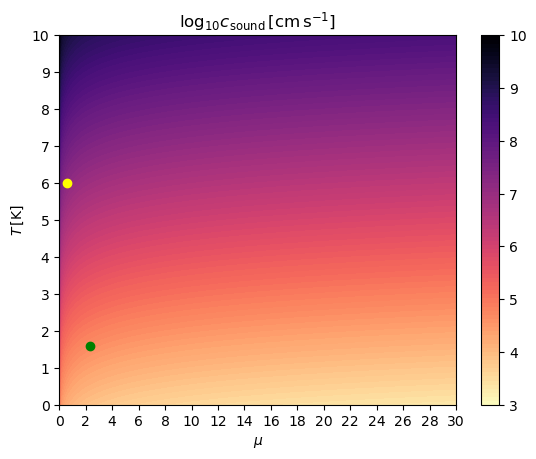

In [6]:
# Plot phase plot, including the two points above.
mu1 = 0.61
T1 = 6

mu2 = 2.3
T2 = 1.60205999133

fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, np.log10(Z), levels=np.linspace(3, 10, 91), cmap='magma_r')
ax.scatter(mu1, T1, c='yellow')
ax.scatter(mu2, T2, c='green')
    
# Add a colorbar and customise axes
fig.colorbar(cp, ticks = np.arange(3,11,1))
ax.set_title(r'$\log_{10} c_{\rm sound}\,\rm [cm\,s^{-1}$]')
ax.set_xticks(np.arange(0,31.0,2.0))
ax.set_xlabel(r'$\mu$')
ax.set_yticks(np.arange(0,11,1))
ax.set_ylabel(r'$T\,\rm [K]$')
plt.show()

## Turbulence:

Turbulence is ubiquitous in the Universe, yet it is not well understood.

It arises as a result of non-linearity in the evolution of fluids (gases and liquids) that have small viscosity, which translates into large Reynolds numbers.

## The Reynolds number:

Given a gas with density, $\rho$, and viscosity $\mu$, moving at a speed, $v$, the Reynolds numbers is:

$$R_{\rm e} = \frac{\rho\,v\,l}{\mu}$$

where $l$ is a characteristic length of the flow.</br>

We can see that $R_e$ depends linearly on $v$, which implies that the Reynolds number becomes larger as the flow velocity increases. This means flows can transition from laminar (low Reynolds numbers) to turbulent (high Reynolds numbers), when the speed increases.

## Turbulence Mach number:

Within a turbulent gas, the velocity field is therefore non-uniform and vary spatially and with time. Therefore, it is common to study it using the root mean square (rms) turbulence Mach number:

$$M_{\rm turb} = \frac{v_{\rm rms}}{c_{\rm sound}},$$

where $v_{\rm rms}=\overline{v^2}$, and $c_{\rm sound}$ is the sound speed of tha gas.
